In [100]:
%matplotlib inline
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from sklearn.neighbors import KernelDensity as KD
from scipy import integrate
from scipy import interpolate
from matplotlib import gridspec
sys.path.insert(0, '/home/john/densityplot/densityplot')
from densityplot.hex_scatter import hex_contour as hex_contour
from scipy import interpolate
from scipy import stats
from sklearn.neighbors import KernelDensity as kde

In [101]:
data = Table.read('/Users/johntimlin/Catalogs/QSO_candidates/Final_S82_candidates_full/QSOs_S82_wzspec_wcolors_wphotoz.fits')

#data = Table.read('/home/john/Catalogs/QSO_Candidates/Final_S82_candidates_full/QSOs_S82_wzspec_wcolors_wphotoz.fits')

zspec = data['ZSPEC']
zphotnw = data['zphotNW']
zphotrf = data['zphotRF']
imag = 22.5-2.5*np.log10(data['iflux'])
print len(imag)
print len(imag[imag<=20.2])
print len(imag[imag>20.2])

15891
8416
7475


In [102]:
#Histogram of the difference between zphot and zspec
dznw = zphotnw-zspec
dzrf = zphotrf-zspec

dznw2 = dznw[(dznw>0) | (dznw <=0)]
dzrf2 = dzrf[(dzrf>0) | (dzrf <=0)]

dznwhz = zphotnw[zspec>=2.9]-zspec[zspec>=2.9]

dznwhz2 = dznwhz[(dznwhz>0) | (dznwhz <=0)]

print len(dznw2[(dznw2>-0.3) & (dznw2<0.3)])/float(len(dznw2))


0.94172435494


/Users/johntimlin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in greater
/Users/johntimlin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in less_equal
/Users/johntimlin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in greater
/Users/johntimlin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in less_equal


0.94172435494
0.932802829355


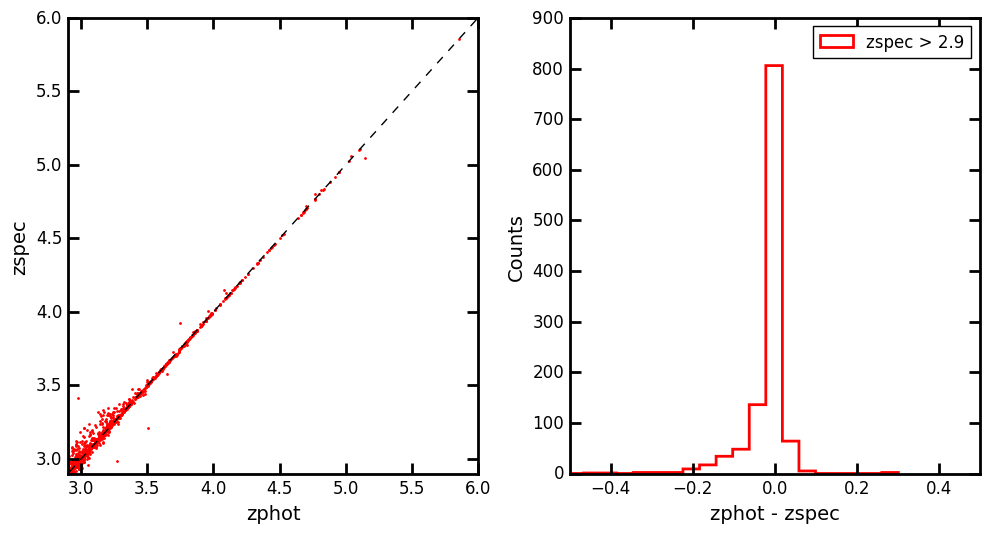

In [127]:
print len(dznw2[(dznw2>-0.3) & (dznw2<0.3)])/float(len(dznw2))
print len(dznwhz2[(dznwhz2>-0.1) & (dznwhz2<0.1)])/float(len(dznwhz2))

#Plotting Parameters (Replace with Group code call!)
params = {'legend.fontsize': 12, 'xtick.labelsize': 12, 'ytick.labelsize': 12, 'xtick.major.width':2, 'xtick.minor.width':2, 'ytick.major.width':2, 'ytick.minor.width':2, 'xtick.major.size':8, 'xtick.minor.size':4, 'ytick.major.size':8, 'ytick.minor.size':4}
plt.rcParams.update(params)
plt.rc("axes", linewidth=2.0)

#Plot for paper
fig = plt.figure(1,figsize = (10,10))
gs = gridspec.GridSpec(1, 2, height_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

ax0.scatter(zphotnw,zspec, s = 1, edgecolor = 'r',facecolor = 'r', alpha = 1)
ax0.plot(range(10),range(10),'k--')
ax0.axvline(2.9,color = 'm')
ax0.axhline(2.9,color = 'm')
ax0.set_xlim(2.9,6)
ax0.set_ylim(2.9,6)
ax0.set_xlabel('zphot',fontsize = 14)
ax0.set_ylabel('zspec',fontsize = 14)

#ax1.hist(dznw2,bins = 70, histtype = 'step',normed = True,color = '#FFA500',linewidth = 2,label = 'zspec < 2.9')
ax1.hist(dznwhz2, bins = 70, histtype = 'step',normed = False,color = 'r',linewidth = 2,label = 'zspec > 2.9')
ax1.set_xlabel('zphot - zspec',fontsize = 14)
ax1.set_ylabel('Counts',fontsize = 14)
ax1.set_xlim(-0.5,0.5)
fig.tight_layout()
plt.legend()
#plt.savefig('specz_vs_photz_S82.pdf',bbox_inches='tight')

plt.show()

/Users/johntimlin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in greater
/Users/johntimlin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in less_equal


694 437
0.864988558352
0.85590778098


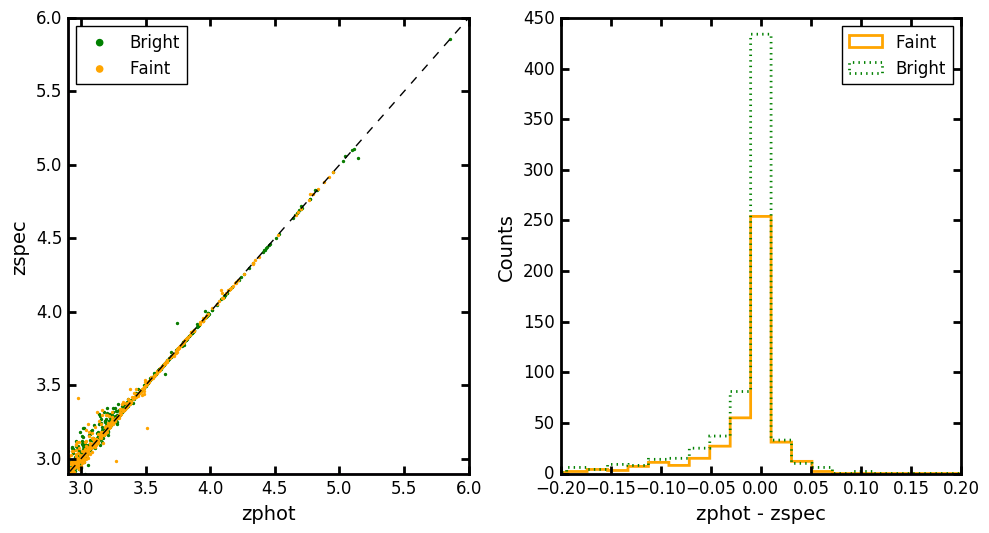

In [20]:
#Split the above histogram in imag
#Less than i = 20.2
fulldiff = zphotnw[(zspec>=2.9) & (imag<=20.2)]-zspec[(zspec>=2.9) & (imag<=20.2)]
fulldiff2 = fulldiff[(fulldiff>0) | (fulldiff <=0)]
#Greater than i=20.2
hzdiffs = zphotnw[(zspec>=2.9) & (imag>=20.2)]-zspec[(zspec>=2.9) & (imag>=20.2)]
hzdiffs2 = hzdiffs[(hzdiffs>0) | (hzdiffs <=0)]

print len(hzdiffs2),len(fulldiff2)

print len(fulldiff2[(fulldiff2>-0.05) & (fulldiff2<0.05)])/float(len(fulldiff2))
print len(hzdiffs2[(hzdiffs2>-0.05) & (hzdiffs2<0.05)])/float(len(hzdiffs2))

bins = np.linspace(-0.5,0.5,50)
#Plotting Parameters (Replace with Group code call!)
params = {'legend.fontsize': 12, 'xtick.labelsize': 12, 'ytick.labelsize': 12, 'xtick.major.width':2, 'xtick.minor.width':2, 'ytick.major.width':2, 'ytick.minor.width':2, 'xtick.major.size':6, 'xtick.minor.size':4, 'ytick.major.size':6, 'ytick.minor.size':4}
plt.rcParams.update(params)
plt.rc("axes", linewidth=2.0)

#Plot for paper
fig = plt.figure(1,figsize = (10,10))
gs = gridspec.GridSpec(1,2, height_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

ax0.scatter(zphotnw[imag>=20.2],zspec[imag>=20.2], s = 2, edgecolor = 'g',facecolor = 'r', alpha = 1,label = None)
ax0.scatter(100,100, s = 20, edgecolor = 'g',facecolor = 'g', label = 'Bright')

ax0.scatter(zphotnw[imag<=20.2],zspec[imag<=20.2], s = 2, edgecolor = '#FFA500',facecolor = '#FFA500', alpha = 1,label = None)
ax0.scatter(100,100, s = 20, edgecolor = '#FFA500',facecolor = '#FFA500', label = 'Faint')



ax0.plot(range(10),range(10),'k--')
ax0.axvline(2.9,color = 'm')
ax0.axhline(2.9,color = 'm')
ax0.set_xlim(2.9,6)
ax0.set_ylim(2.9,6)
ax0.set_xlabel('zphot',fontsize = 14)
ax0.set_ylabel('zspec',fontsize = 14)
ax0.legend(scatterpoints = 1, loc = 2)

ax1.hist(fulldiff2,bins, histtype = 'step',normed = False,color = '#FFA500',linewidth = 2,label = 'Faint')
ax1.hist(hzdiffs2, bins , histtype = 'step',normed = False,color = 'g',linewidth = 2,linestyle = ':',label = 'Bright')
ax1.set_xlabel('zphot - zspec',fontsize = 14)
ax1.set_ylabel('Counts',fontsize = 14)
ax1.set_xlim(-0.2,0.2)
fig.tight_layout()
plt.legend()
plt.savefig('specz_vs_photz_S82.pdf',bbox_inches='tight')

plt.show()


In [22]:
### Full color-z plots

In [106]:
### DEFINE THE TRAINING SET
#JT PATH ON TRITON to training set after classification
data = Table.read('/Users/johntimlin/Catalogs/QSO_Candidates/Training_set/GTR-ADM-QSO-ir-testhighz_findbw_lup_2016_starclean_with_shenlabel.fits')
#data = Table.read('/home/john/Catalogs/QSO_Candidates/Training_set/GTR-ADM-QSO-ir-testhighz_findbw_lup_2016_starclean_with_shenlabel.fits')


#Fill all cells in arrays
data = data.filled()

# Remove stars from training data 
qmask = (data['zspec']>0)
ext = (data['morph']!=6)
pt = (data['morph']==6)

qdata = data[qmask]
edata = data[ext]
pdata = data[pt]

In [107]:
### DEFINE THE TEST SET
# TEST DATA USING 2.9<z<5.4 zrange ON HOME
testdata = Table.read('/Users/johntimlin/Clustering_Paper_Code_Stable/Angular_Clustering_Final/Data_Sets/QSO_Candidates_allcuts_with_errors_visualinsp.fits')
#testdata = Table.read('/home/john/Clustering_Paper_Code_Stable/Angular_Clustering_Final/Data_Sets/QSO_Candidates_allcuts_with_errors_visualinsp.fits')

testdata=testdata.filled()
#Limit to objects that have been classified as quasars
qsocandmask = ((testdata['ypredRFC']==0) | (testdata['ypredSVM']==0) | (testdata['ypredBAG']==0))

testdatacand = testdata[qsocandmask & (testdata['Good_obj'] == 0)]
print len(testdata),len(testdatacand)

9076 8872


In [108]:
#Find the mean of the distribution
#The purpose of this function is to compute the mean of the color-z distribution using the spectrocopic redshifts of
#known quasars
def Detect_mode(color, z, zbins = np.arange(0,5.5,0.1),sigval=1.0):
    
    modecol = []
    sigpl = []
    sigmin = []
    zavg = []
    for i in range(len(zbins)-1):
        #separate into the redshift bins
        zlow = zbins[i]
        zhigh = zbins[i+1]
        #Cut the color data according to bin
        flatcol = color[((z>=zlow)&(z<=zhigh))]
        tempcol = color[((z>=zlow)&(z<=zhigh))][:, np.newaxis] #change the array from row shape (1) to column shape (1,)
        #After the KDE is trained on the data colors, input an evenly spaced grid into the score_sample to get density
        sample_range = np.linspace(min(tempcol[:, 0]), max(tempcol[:, 0]), len(tempcol[:, 0]))[:, np.newaxis]
        #Run the KDE
        est = kde(bandwidth=0.1,kernel='epanechnikov') #Set up the Kernel
        value = est.fit(tempcol).score_samples(sample_range) #fit the kernel to the data and find the density of the grid
        med = sample_range[value == max(value)] #Find where the color with the maximum density       
        modecol.append(med[0][0]) #append the color to a list for interpolation
        
        ## Find the standard deviation of the data
        sigma_plus = np.sqrt(np.sum((flatcol[flatcol - med[0][0] >0.0] - med[0][0])**2) / float(len(flatcol[flatcol - med[0][0] >0.0]))) 
        sigma_minus = np.sqrt(np.sum((flatcol[flatcol - med[0][0] <0.0] - med[0][0])**2) / float(len(flatcol[flatcol - med[0][0] <0.0])))
        
        sigpl.append(sigma_plus)
        sigmin.append(sigma_minus)
        
        zavg.append((zlow+zhigh)/2.0)
        #zavg.append(zlow)
        '''
        #Plot the KDE for each redshift bin
        plt.plot(sample_range[:,0],np.exp(value))
        plt.show()       
        '''
    #Interpolate the color redshift relation given the average redshift and the densest colors at each redshift
    #Also interpolates the 1 sigma line above and below the mean
    
   
    col = interpolate.interp1d(zavg,np.asarray(modecol))
    sp = interpolate.interp1d(zavg,np.asarray(modecol)+sigval*np.asarray(sigpl))
    sm = interpolate.interp1d(zavg,np.asarray(modecol)-sigval*np.asarray(sigmin))

    
    return col,sp,sm

In [109]:
ugmode = Detect_mode(qdata['ug'],qdata['zspec'])
grmode = Detect_mode(qdata['gr'],qdata['zspec'])
rimode = Detect_mode(qdata['ri'],qdata['zspec'])
izmode = Detect_mode(qdata['iz'],qdata['zspec'])
zc1mode = Detect_mode(qdata['zs1'],qdata['zspec'])
c1c2mode = Detect_mode(qdata['s1s2'],qdata['zspec'])

/Users/johntimlin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in double_scalars
/Users/johntimlin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in double_scalars


In [110]:
modeug = ugmode[0](np.linspace(0.1,5.3,100))
modegr = grmode[0](np.linspace(0.1,5.3,100))
moderi = rimode[0](np.linspace(0.1,5.3,100))
modeiz = izmode[0](np.linspace(0.1,5.3,100))
modezc1 = zc1mode[0](np.linspace(0.1,5.3,100))
modec1c2 = c1c2mode[0](np.linspace(0.1,5.3,100))


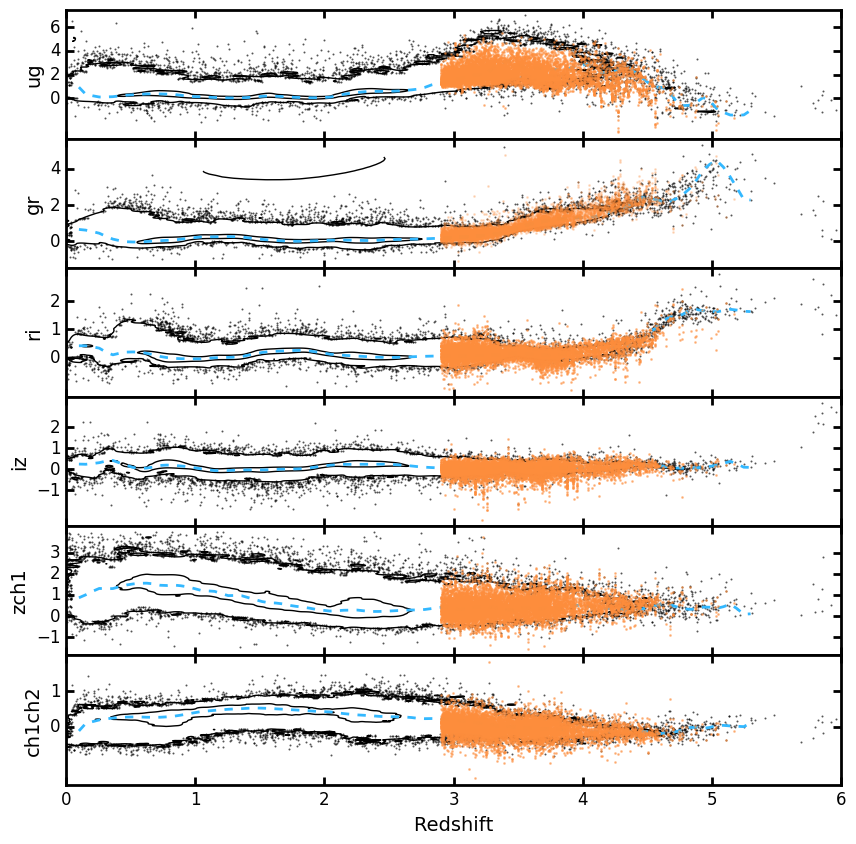

In [111]:
#Plot for paper
fig = plt.figure(2,figsize = (10,10))
gs = gridspec.GridSpec(6, 1)#, width_ratios=[1,1])#,1,1,1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1],sharex = ax0)
ax2 = plt.subplot(gs[2],sharex = ax1)
ax3 = plt.subplot(gs[3],sharex = ax2)
ax4 = plt.subplot(gs[4],sharex = ax3)
ax5 = plt.subplot(gs[5],sharex = ax4)

plt.axes(ax0)
hex_contour(qdata['zspec'],qdata['ug'], levels=[0.5,0.99], std=True, min_cnt=7, smoothing=4, hkwargs={'gridsize':75}, skwargs={'color':'k','alpha':0.5,'marker':'.'}, ckwargs={'colors':'k','alpha':1,'linewidths':1})
plt.plot(np.linspace(0.1,5.3,100),modeug, linewidth = 2,linestyle = '--', color = '#33B8FF')
plt.scatter(testdatacand['zphotNW'],testdatacand['ug'],s = 1, color = '#fd8d3c',alpha = 0.5, zorder = 100)
ax0.set_xlim(0,6)
ax0.yaxis.set_ticks([0,2,4,6])
ax0.set_ylabel('ug',fontsize = 14)

plt.axes(ax1)
hex_contour(qdata['zspec'],qdata['gr'], levels=[0.5,0.99], std=True, min_cnt=7, smoothing=4, hkwargs={'gridsize':75}, skwargs={'color':'k','alpha':0.5,'marker':'.'}, ckwargs={'colors':'k','alpha':1,'linewidths':1})
plt.plot(np.linspace(0.1,5.3,100),modegr, linewidth = 2,linestyle = '--', color = '#33B8FF')
plt.scatter(testdatacand['zphotNW'],testdatacand['gr'],s = 1, color = '#fd8d3c',alpha = 0.255, zorder = 100)
#ax1.set_xlim(0,6)
ax1.yaxis.set_ticks([0,2,4])
ax1.set_ylabel('gr',fontsize = 14)

plt.axes(ax2)
hex_contour(qdata['zspec'],qdata['ri'], levels=[0.5,0.99], std=True, min_cnt=7, smoothing=4, hkwargs={'gridsize':75}, skwargs={'color':'k','alpha':0.5,'marker':'.'}, ckwargs={'colors':'k','alpha':1,'linewidths':1})
plt.plot(np.linspace(0.1,5.3,100),moderi, linewidth = 2,linestyle = '--', color = '#33B8FF')
plt.scatter(testdatacand['zphotNW'],testdatacand['ri'],s = 1, color = '#fd8d3c',alpha = 0.5, zorder = 100)
#ax2.set_xlim(0,6)
ax2.yaxis.set_ticks([0,1,2])
ax2.set_ylabel('ri',fontsize = 14)

plt.axes(ax3)
hex_contour(qdata['zspec'],qdata['iz'], levels=[0.5,0.99], std=True, min_cnt=7, smoothing=4, hkwargs={'gridsize':75}, skwargs={'color':'k','alpha':0.5,'marker':'.'}, ckwargs={'colors':'k','alpha':1,'linewidths':1})
plt.plot(np.linspace(0.1,5.3,100),modeiz, linewidth = 2,linestyle = '--', color = '#33B8FF')
plt.scatter(testdatacand['zphotNW'],testdatacand['iz'],s = 1, color = '#fd8d3c',alpha = 0.5, zorder = 100)
#ax3.set_xlim(0,6)
ax3.yaxis.set_ticks([-1,0,1,2])
ax3.set_ylabel('iz',fontsize = 14)

plt.axes(ax4)
hex_contour(qdata['zspec'],qdata['zs1'], levels=[0.5,0.99], std=True, min_cnt=7, smoothing=4, hkwargs={'gridsize':75}, skwargs={'color':'k','alpha':0.5,'marker':'.'}, ckwargs={'colors':'k','alpha':1,'linewidths':1})
plt.plot(np.linspace(0.1,5.3,100),modezc1, linewidth = 2,linestyle = '--', color = '#33B8FF')
plt.scatter(testdatacand['zphotNW'],testdatacand['zs1'],s = 1, color = '#fd8d3c',alpha = 0.5, zorder = 100)
#ax4.set_xlim(0,6)
ax4.yaxis.set_ticks([-1,0,1,2,3])
ax4.set_ylabel('zch1',fontsize = 14)

plt.axes(ax5)
hex_contour(qdata['zspec'],qdata['s1s2'], levels=[0.5,0.99], std=True, min_cnt=7, smoothing=4, hkwargs={'gridsize':75}, skwargs={'color':'k','alpha':0.5,'marker':'.'}, ckwargs={'colors':'k','alpha':1,'linewidths':1})
plt.plot(np.linspace(0.1,5.3,100),modec1c2, linewidth = 2,linestyle = '--', color = '#33B8FF')
plt.scatter(testdatacand['zphotNW'],testdatacand['s1s2'],s = 1, color = '#fd8d3c',alpha = 0.5, zorder = 100)
#ax5.set_xlim(0,6)
ax5.set_ylabel('ch1ch2',fontsize = 14)
ax5.yaxis.set_ticks([0,1])

plt.subplots_adjust(hspace=.0)
plt.setp(ax0.get_xticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax4.get_xticklabels(), visible=False)

#fig.tight_layout()
plt.xlabel('Redshift',fontsize = 14)
#plt.savefig('col_specz.pdf',bbox_inches='tight')
plt.show()


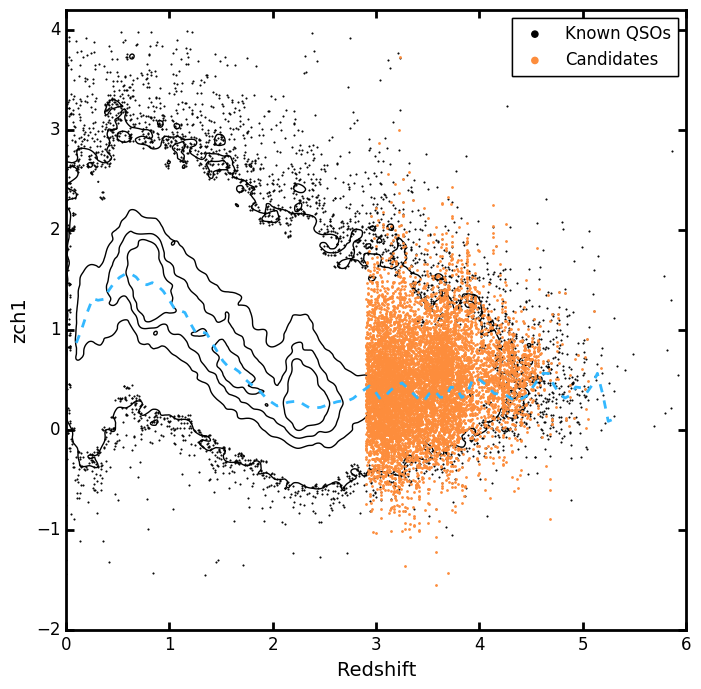

In [22]:
#Single color plot
fig = plt.figure(3,figsize = (8,8))
hex_contour(qdata['zspec'],qdata['zs1'], levels=[0.25,0.5,0.75,0.99], std=True, min_cnt=7, smoothing=4, hkwargs={'gridsize':75}, skwargs={'color':'k','alpha':0.9,'marker':'.'}, ckwargs={'colors':'k','alpha':1,'linewidths':1})
plt.scatter(testdatacand['zphotNW'],testdatacand['zs1'],s = 1, color = '#fd8d3c',alpha = 1, zorder = 100)
plt.plot(np.linspace(0.1,5.3,100),modezc1, linewidth = 2,linestyle = '--', color = '#33B8FF',zorder = 200)
know = plt.scatter(100,100,color = 'k')
cand = plt.scatter(100,100,color = '#fd8d3c')
plt.xlim(0,6)
plt.ylim(-2,4.2)
#plt.yaxis.set_ticks([-1,0,1,2,3])
plt.ylabel('zch1',fontsize = 14)
plt.xlabel('Redshift',fontsize = 14)
first_legend = plt.legend([know,cand],['Known QSOs','Candidates'], loc=1,scatterpoints = 1)
plt.gca().add_artist(first_legend)
plt.savefig('col_specz_single.pdf',bbox_inches='tight')
plt.show()

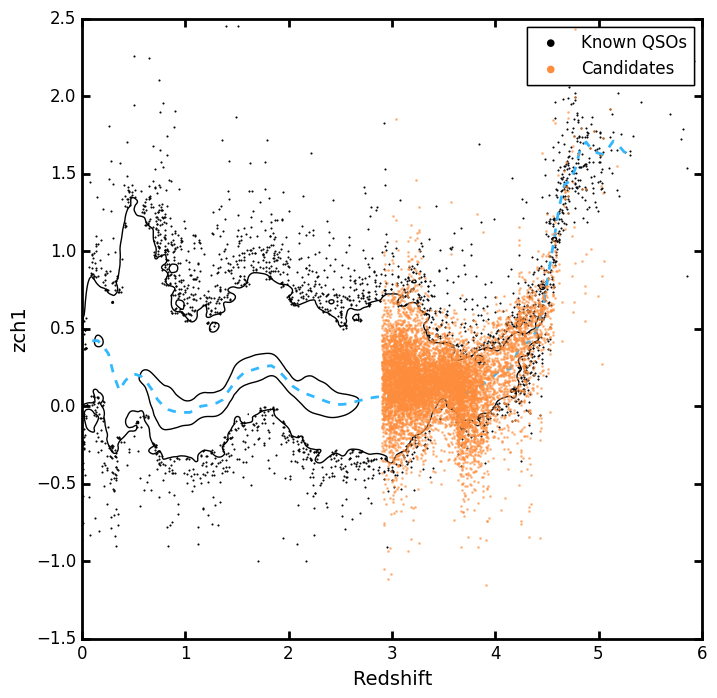

In [113]:
#Single color plot
fig = plt.figure(3,figsize = (8,8))
hex_contour(qdata['zspec'],qdata['ri'], levels=[0.5,0.99], std=True, min_cnt=7, smoothing=4, hkwargs={'gridsize':75}, skwargs={'color':'k','alpha':0.9,'marker':'.'}, ckwargs={'colors':'k','alpha':1,'linewidths':1})
plt.scatter(testdatacand['zphotNW'],testdatacand['ri'],s = 1, color = '#fd8d3c',alpha = 0.5, zorder = 100)
plt.plot(np.linspace(0.1,5.3,100),moderi, linewidth = 2,linestyle = '--', color = '#33B8FF')
know = plt.scatter(100,100,color = 'k')
cand = plt.scatter(100,100,color = '#fd8d3c')
plt.xlim(0,6)
plt.ylim(-1.5,2.5)
#plt.yaxis.set_ticks([-1,0,1,2,3])
plt.ylabel('zch1',fontsize = 14)
plt.xlabel('Redshift',fontsize = 14)
first_legend = plt.legend([know,cand],['Known QSOs','Candidates'], loc=1,scatterpoints = 1)
plt.gca().add_artist(first_legend)
#plt.savefig('col_specz_single.pdf',bbox_inches='tight')
plt.show()

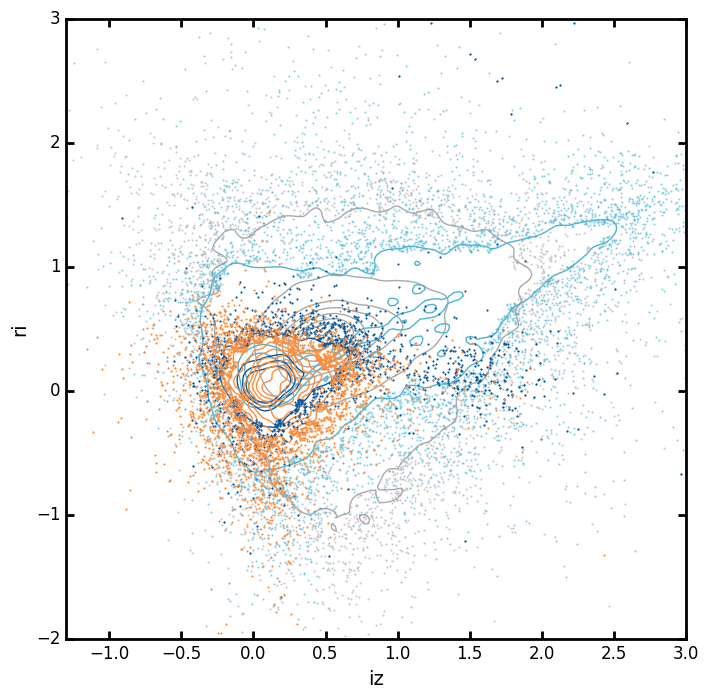

In [114]:
#Single color plot

lowz = qdata['zspec']<=2.25
midz = (qdata['zspec']>2.25)&(qdata['zspec']<=3.45)
highz= qdata['zspec']>=2.9

fig = plt.figure(9,figsize = (8,8))
hex_contour(edata['ri'],edata['iz'], levels=[0.1,0.3,0.4,0.5,0.6,0.7,0.9,0.99], std=True, min_cnt=5, smoothing=2, hkwargs={'gridsize':50}, skwargs={'color':'#A9A9A9','alpha':0.5,'marker':'.'}, ckwargs={'colors':'#A9A9A9','alpha':1,'linewidths':1})
hex_contour(pdata['ri'],pdata['iz'], levels=[0.5,0.7,0.99], std=True, min_cnt=5, smoothing=2, hkwargs={'gridsize':50}, skwargs={'color':'#4eb3d3','alpha':0.5,'marker':'.'}, ckwargs={'colors':'#4eb3d3','alpha':1,'linewidths':1})
#hex_contour(qdata['ri'][lowz],qdata['iz'][lowz], levels=[0.1,0.3,0.4,0.5,0.6,0.7,0.9,0.99], std=True, min_cnt=5, smoothing=2, hkwargs={'gridsize':50}, skwargs={'color':'b','alpha':0.5,'marker':'.'}, ckwargs={'colors':'b','alpha':1,'linewidths':1})
#hex_contour(qdata['ri'][midz],qdata['iz'][midz], levels=[0.1,0.3,0.4,0.5,0.6,0.77,0.9,0.99], std=True, min_cnt=5, smoothing=2, hkwargs={'gridsize':50}, skwargs={'color':'c','alpha':0.5,'marker':'.'}, ckwargs={'colors':'c','alpha':1,'linewidths':1})
hex_contour(qdata['ri'][highz],qdata['iz'][highz], levels=[0.5,0.6,0.7,0.9], std=True, min_cnt=5, smoothing=2, hkwargs={'gridsize':50}, skwargs={'color':'#08589e','alpha':1,'marker':'.'}, ckwargs={'colors':'#08589e','alpha':1,'linewidths':1})
hex_contour(testdatacand['ri'],testdatacand['iz'], levels=[0.1,0.2,0.3,0.4,0.5,0.6,0.7], std=True, min_cnt=5, smoothing=2, hkwargs={'gridsize':50}, skwargs={'color':'#fd8d3c','alpha':1,'marker':'.'}, ckwargs={'colors':'#fd8d3c','alpha':1,'linewidths':1})

#plt.scatter(testdatacand['ri'],testdatacand['iz'],s = 1, color = '#fd8d3c',alpha = 1, zorder = 100)
#know = plt.scatter(100,100,color = 'k')
#cand = plt.scatter(100,100,color = '#fd8d3c')
plt.xlim(-1.3,3)
plt.ylim(-2,3)
#plt.yaxis.set_ticks([-1,0,1,2,3])
plt.ylabel('ri',fontsize = 14)
plt.xlabel('iz',fontsize = 14)
#first_legend = plt.legend([know,cand],['Known QSOs','Candidates'], loc=1,scatterpoints = 1)
#plt.gca().add_artist(first_legend)
#plt.savefig('col_specz_single.pdf',bbox_inches='tight')
plt.show()

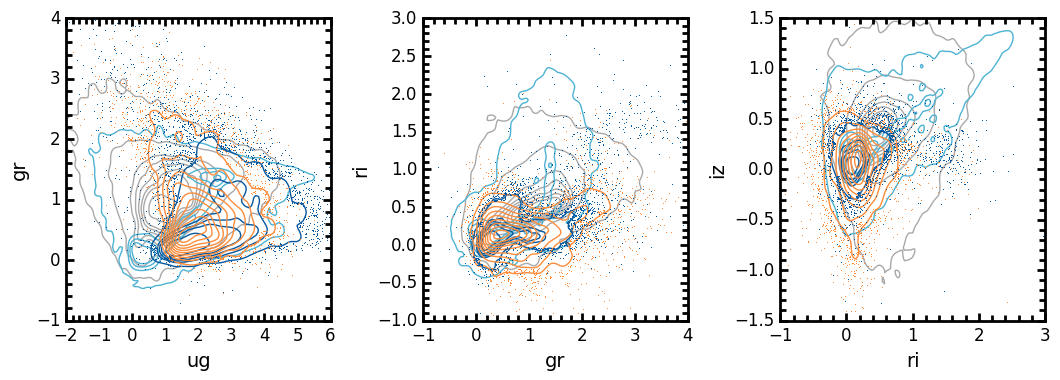

In [146]:
#Color-color Plot for paper


lowz = qdata['zspec']<=2.25
midz = (qdata['zspec']>2.25)&(qdata['zspec']<=3.45)
highz= qdata['zspec']>=2.9


fig = plt.figure(12,figsize = (16,16))
gs = gridspec.GridSpec(1, 3, height_ratios=[1,1,1,1,1],width_ratios=[1,1,1,1,1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])


plt.axes(ax0)
hex_contour(edata['ug'],edata['gr'], levels=[0.1,0.3,0.4,0.5,0.6,0.7,0.9,0.99], std=True, min_cnt=5, smoothing=2, hkwargs={'gridsize':50}, skwargs={'color':'#A9A9A9','alpha':0.5,'marker':''}, ckwargs={'colors':'#A9A9A9','alpha':1,'linewidths':1})
hex_contour(pdata['ug'],pdata['gr'], levels=[0.3,0.5,0.7,0.99], std=True, min_cnt=5, smoothing=2, hkwargs={'gridsize':50}, skwargs={'color':'#4eb3d3','alpha':0.5,'marker':''}, ckwargs={'colors':'#4eb3d3','alpha':1,'linewidths':1})
hex_contour(qdata['ug'][highz],qdata['gr'][highz], levels=[0.3,0.5,0.6,0.7,0.9], std=True, min_cnt=5, smoothing=2, hkwargs={'gridsize':25}, skwargs={'color':'#08589e','alpha':1,'marker':','}, ckwargs={'colors':'#08589e','alpha':1,'linewidths':1})
hex_contour(testdatacand['ug'],testdatacand['gr'], levels=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], std=True, min_cnt=5, smoothing=2, hkwargs={'gridsize':25}, skwargs={'color':'#fd8d3c','alpha':1,'marker':','}, ckwargs={'colors':'#fd8d3c','alpha':1,'linewidths':1})

ax0.set_xlim(-2,6)
ax0.set_ylim(-1,4)
ax0.set_xlabel('ug',fontsize = 14)
ax0.set_ylabel('gr',fontsize = 14)
ax0.minorticks_on()

plt.axes(ax1)
hex_contour(edata['gr'],edata['ri'], levels=[0.1,0.3,0.4,0.5,0.6,0.7,0.9,0.99], std=True, min_cnt=5, smoothing=2, hkwargs={'gridsize':50}, skwargs={'color':'#A9A9A9','alpha':0.5,'marker':''}, ckwargs={'colors':'#A9A9A9','alpha':1,'linewidths':1})
hex_contour(pdata['gr'],pdata['ri'], levels=[0.3,0.5,0.7,0.99], std=True, min_cnt=5, smoothing=2, hkwargs={'gridsize':50}, skwargs={'color':'#4eb3d3','alpha':0.5,'marker':''}, ckwargs={'colors':'#4eb3d3','alpha':1,'linewidths':1})
hex_contour(qdata['gr'][highz],qdata['ri'][highz], levels=[0.3,0.5,0.6,0.7,0.9], std=True, min_cnt=5, smoothing=2, hkwargs={'gridsize':50}, skwargs={'color':'#08589e','alpha':1,'marker':','}, ckwargs={'colors':'#08589e','alpha':1,'linewidths':1})
hex_contour(testdatacand['gr'],testdatacand['ri'], levels=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], std=True, min_cnt=5, smoothing=2, hkwargs={'gridsize':25}, skwargs={'color':'#fd8d3c','alpha':1,'marker':','}, ckwargs={'colors':'#fd8d3c','alpha':1,'linewidths':1})

ax1.set_xlim(-1,4)
ax1.set_ylim(-1,3)
ax1.set_xlabel('gr',fontsize = 14)
ax1.set_ylabel('ri',fontsize = 14)
ax1.minorticks_on()

plt.axes(ax2)
hex_contour(edata['ri'],edata['iz'], levels=[0.1,0.3,0.4,0.5,0.6,0.7,0.9,0.99], std=True, min_cnt=5, smoothing=2, hkwargs={'gridsize':50}, skwargs={'color':'#A9A9A9','alpha':0.5,'marker':''}, ckwargs={'colors':'#A9A9A9','alpha':1,'linewidths':1})
hex_contour(pdata['ri'],pdata['iz'], levels=[0.3,0.5,0.7,0.99], std=True, min_cnt=5, smoothing=2, hkwargs={'gridsize':50}, skwargs={'color':'#4eb3d3','alpha':0.5,'marker':''}, ckwargs={'colors':'#4eb3d3','alpha':1,'linewidths':1})
hex_contour(qdata['ri'][highz],qdata['iz'][highz], levels=[0.3,0.5,0.6,0.7,0.9], std=True, min_cnt=5, smoothing=2, hkwargs={'gridsize':50}, skwargs={'color':'#08589e','alpha':1,'marker':','}, ckwargs={'colors':'#08589e','alpha':1,'linewidths':1})
hex_contour(testdatacand['ri'],testdatacand['iz'], levels=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], std=True, min_cnt=5, smoothing=2, hkwargs={'gridsize':25}, skwargs={'color':'#fd8d3c','alpha':1,'marker':','}, ckwargs={'colors':'#fd8d3c','alpha':1,'linewidths':1})

ax2.set_xlim(-1,3)
ax2.set_ylim(-1.5,1.5)
ax2.set_xlabel('ri',fontsize = 14)
ax2.set_ylabel('iz',fontsize = 14)
ax2.xaxis.set_ticks([-1,0,1,2,3])
ax2.minorticks_on()

fig.tight_layout()
plt.savefig('opt_cand_colors.pdf',bbox_inches='tight')
plt.show()



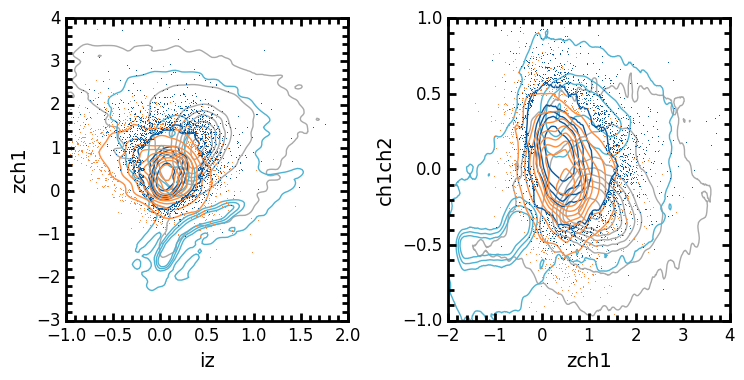

In [147]:
#Plot the infrared
highz= qdata['zspec']>=2.9

fig = plt.figure(13,figsize = (16,16))
gs = gridspec.GridSpec(1, 2, height_ratios=[1,1,1,1,1],width_ratios=[1,1,1,1,1])
ax3 = plt.subplot(gs[0])
ax4 = plt.subplot(gs[1])

plt.axes(ax3)
hex_contour(edata['iz'],edata['zs1'], levels=[0.1,0.3,0.4,0.5,0.6,0.7,0.9,0.99], std=True, min_cnt=5, smoothing=2, hkwargs={'gridsize':50}, skwargs={'color':'#A9A9A9','alpha':0.5,'marker':''}, ckwargs={'colors':'#A9A9A9','alpha':1,'linewidths':1})
hex_contour(pdata['iz'],pdata['zs1'], levels=[0.3,0.5,0.7,0.99], std=True, min_cnt=5, smoothing=2, hkwargs={'gridsize':50}, skwargs={'color':'#4eb3d3','alpha':0.5,'marker':''}, ckwargs={'colors':'#4eb3d3','alpha':1,'linewidths':1})
hex_contour(qdata['iz'][highz],qdata['zs1'][highz], levels=[0.3,0.5,0.6,0.7,0.9], std=True, min_cnt=5, smoothing=2, hkwargs={'gridsize':50}, skwargs={'color':'#08589e','alpha':1,'marker':','}, ckwargs={'colors':'#08589e','alpha':1,'linewidths':1})
hex_contour(testdatacand['iz'],testdatacand['zs1'], levels=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], std=True, min_cnt=5, smoothing=2, hkwargs={'gridsize':25}, skwargs={'color':'#fd8d3c','alpha':1,'marker':','}, ckwargs={'colors':'#fd8d3c','alpha':1,'linewidths':1})

ax3.set_xlim(-1,2)
ax3.set_ylim(-3,4)
ax3.set_xlabel('iz',fontsize = 14)
ax3.set_ylabel('zch1',fontsize = 14)
ax3.minorticks_on()

plt.axes(ax4)
hex_contour(edata['zs1'],edata['s1s2'], levels=[0.1,0.3,0.4,0.5,0.6,0.7,0.9,0.99], std=True, min_cnt=5, smoothing=2, hkwargs={'gridsize':50}, skwargs={'color':'#A9A9A9','alpha':0.5,'marker':''}, ckwargs={'colors':'#A9A9A9','alpha':1,'linewidths':1})
hex_contour(pdata['zs1'],pdata['s1s2'], levels=[0.3,0.5,0.7,0.99], std=True, min_cnt=5, smoothing=2, hkwargs={'gridsize':50}, skwargs={'color':'#4eb3d3','alpha':0.5,'marker':''}, ckwargs={'colors':'#4eb3d3','alpha':1,'linewidths':1})
hex_contour(qdata['zs1'][highz],qdata['s1s2'][highz], levels=[0.3,0.5,0.6,0.7,0.9], std=True, min_cnt=5, smoothing=1, hkwargs={'gridsize':25}, skwargs={'color':'#08589e','alpha':1,'marker':','}, ckwargs={'colors':'#08589e','alpha':1,'linewidths':1})
hex_contour(testdatacand['zs1'],testdatacand['s1s2'], levels=[0.1,0.3,0.4,0.5,0.6,0.7,0.8,0.9], std=True, min_cnt=5, smoothing=2, hkwargs={'gridsize':25}, skwargs={'color':'#fd8d3c','alpha':1,'marker':','}, ckwargs={'colors':'#fd8d3c','alpha':1,'linewidths':1})

ax4.set_xlim(-2,4)
ax4.set_ylim(-1,1)
ax4.set_xlabel('zch1',fontsize = 14)
ax4.set_ylabel('ch1ch2',fontsize = 14)
ax4.minorticks_on()


fig.tight_layout()
plt.savefig('ir_cand_colors.pdf',bbox_inches='tight')
plt.show()